In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Practice DA\2-ML\3- Module 48 Practice\Data\stud.csv')

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [9]:
df.duplicated().sum()

0

In [10]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [11]:
num_col=[col for col in df.columns if df[col].dtype!='O']
cat_col=[col for col in df.columns if df[col].dtype=='O']

In [12]:
def values(col_list):
    for i in col_list:
        count=df[i].value_counts()
        print(count)
values(cat_col)

gender
female    518
male      482
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [13]:
df[num_col].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [14]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_score']=(df['Total_Score']/3).round(2)

In [15]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


In [16]:
df.groupby('gender')['Total_Score'].mean()

gender
female    208.708494
male      197.512448
Name: Total_Score, dtype: float64

Text(0, 0.5, 'Score')

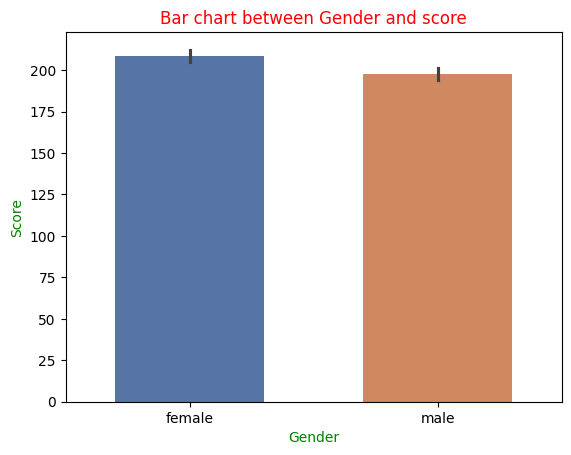

In [17]:
sns.barplot(x='gender',y=df['Total_Score'],data=df,hue=df['gender'],palette='deep',saturation=0.8,width=0.6)
plt.title('Bar chart between Gender and score',loc='center',color='Red')
plt.xlabel('Gender',color='Green')
plt.ylabel('Score',color='Green')

In [18]:
x=df.groupby('gender')['Total_Score'].mean()
x

gender
female    208.708494
male      197.512448
Name: Total_Score, dtype: float64

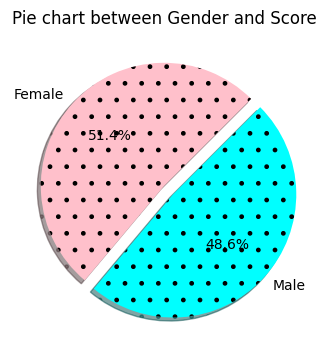

In [19]:
#pie chart
plt.figure(figsize=(4,4))
plt.pie(x=x,labels=['Female','Male'],explode=[0, 0.1],colors=['pink','cyan'],hatch=['.'],autopct='%1.1f%%',pctdistance=0.6,shadow=3,startangle=45,wedgeprops={'capstyle':'butt'})
plt.title('Pie chart between Gender and Score')
plt.show()

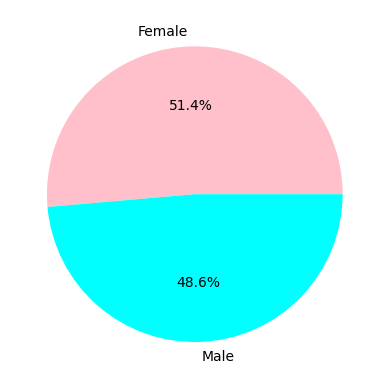

In [20]:
plt.pie(x=x,autopct='%1.1f%%',colors=['pink','cyan'],labels=['Female','Male'])
plt.show()

In [48]:
from  sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score


In [22]:
scaler=StandardScaler()
ohe=OneHotEncoder()

In [32]:
num_col=x.select_dtypes(exclude='O').columns
cat_col=x.select_dtypes(include='O').columns

In [33]:
preprocessor=ColumnTransformer(
[('num_col',scaler,num_col),
('cat_col',ohe,cat_col)]
)

In [34]:
x=df.drop('math_score',axis=1)
y=df['math_score']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [36]:
x_train.shape

(800, 9)

In [37]:
y_train.shape

(800,)

In [38]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [41]:
models={
    'LinearRegression':LinearRegression(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'Randomforest':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'svr':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor()
}

In [43]:
models.values()

dict_values([LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(), KNeighborsRegressor()])

In [47]:
for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(list(models.keys())[i])
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=root_mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    print('mean squared error:',mse)
    print('mean absolute error:',mae)
    print('root mean squared error:',rmse)
    print('r2 score',r2)
    print('===================================')

LinearRegression
mean squared error: 7.199460165409042e-28
mean absolute error: 2.1103119252074977e-14
root mean squared error: 2.6831809788773178e-14
r2 score 1.0
DecisionTreeRegressor
mean squared error: 14.24
mean absolute error: 2.91
root mean squared error: 3.7735924528226414
r2 score 0.9256625798921716
Randomforest
mean squared error: 8.503974999999999
mean absolute error: 2.3025
root mean squared error: 2.916157574617668
r2 score 0.9556064914212451
AdaBoostRegressor
mean squared error: 18.194393830438674
mean absolute error: 3.3103038462009007
root mean squared error: 4.265488697727222
r2 score 0.9050193611109129
svr
mean squared error: 24.201446856964303
mean absolute error: 3.6114251945273255
root mean squared error: 4.919496606052728
r2 score 0.8736605953494776
KNeighborsRegressor
mean squared error: 26.7548
mean absolute error: 4.162000000000001
root mean squared error: 5.172504229094453
r2 score 0.8603312635181932


In [57]:
rf_params={
    'n_estimators': [50, 100, 200],                # Number of trees
    'max_depth': [None, 5, 10, 15],                 # Maximum depth of trees
    'min_samples_split': [2, 5, 10],                # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples in leaf node
    'max_features': ['log2', None],         # Number of features to consider                    # Out-of-bag score estimation
}
adab_param = {
    'n_estimators': [50, 100, 200],               # Number of estimators (trees)
    'learning_rate': [0.01, 0.1, 0.5, 1.0],       # Learning rate
    'loss': ['linear','square','exponential'],              # Boosting algorithm
}
gb_param_grid = {
    'n_estimators': [50, 100, 200],             # Number of trees
    'learning_rate': [0.001, 0.01, 0.1, 0.2],   # Learning rate
    'max_depth': [3, 5, 10],                     # Max depth of trees
    'min_samples_split': [2, 5, 10],             # Minimum samples to split
    'min_samples_leaf': [1, 2, 5],               # Minimum samples in leaf node
    'subsample': [0.7, 0.8, 1.0],                # Subsample size
    'max_features': ['sqrt', 'log2', None],      # Features to consider for splits
}
xgb_param_grid = {
    'n_estimators': [50, 100, 200],              # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     # Learning rate (eta)
    'max_depth': [3, 5, 10],                      # Max depth of each tree
    'min_child_weight': [1, 5, 10],                # Minimum child weight
    'subsample': [0.5, 0.7, 1.0],                 # Fraction of training data to use
    'colsample_bytree': [0.5, 0.7, 1.0],          # Fraction of features to use
    'gamma': [0, 0.1, 0.2],                       # Minimum loss reduction for partition
    'lambda': [0, 0.1, 1.0],                      # L2 regularization
    'alpha': [0, 0.1, 1.0],                       # L1 regularization
}
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],              # Number of neighbors
    'weights': ['uniform', 'distance'],           # Weighting of neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Nearest neighbors algorithm
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': [1, 2],                                  # Power parameter for Minkowski
    'leaf_size': [20, 30, 40]                     # Leaf size for tree-based algorithms
}
svr_params={
    'C':[0.1,1,10,100],
    'kernel':['linear','rbf']
}
dt_params={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','log2']
}
lr_param_grid = {
    'fit_intercept': [True, False]
}

In [58]:
models=[
    ('LinearRegression',LinearRegression(),lr_param_grid),
    ('DecisionTreeRegressor',DecisionTreeRegressor(),dt_params),
    ('Randomforest',RandomForestRegressor(),rf_params),
    ('AdaBoostRegressor',AdaBoostRegressor(),adab_param),
    ('svr',SVR(),svr_params),
    ('KNeighborsRegressor',KNeighborsRegressor(),knn_param_grid)
]

In [59]:
for name,model,params in models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,scoring='neg_mean_squared_error',n_jobs=-1,random_state=42)
    random.fit(x_train,y_train)
    print(random.best_params_)
    print(random.best_score_)

d:\Generative ai\aienv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'fit_intercept': True}
-7.984471429412576e-27
{'splitter': 'best', 'max_features': 'log2', 'max_depth': 5, 'criterion': 'squared_error'}
-46.368098022518
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
-10.301269737551591
{'n_estimators': 200, 'loss': 'exponential', 'learning_rate': 1.0}
-17.299816106568507


d:\Generative ai\aienv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'kernel': 'linear', 'C': 100}
-0.0018546885864916944
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'metric': 'manhattan', 'leaf_size': 30, 'algorithm': 'kd_tree'}
-25.63756263015017
